In [1]:
import os
from os.path import isdir, join

from pathlib import Path
import pandas as pd
import time
#loadmat
from scipy.io import loadmat,savemat

# Math
import numpy as np
from scipy.fftpack import fft, dct
from scipy import signal
from scipy.stats import norm,multivariate_normal
from scipy.io import wavfile
import librosa

from sklearn.decomposition import PCA

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd

#math
import math

%matplotlib inline

# Frame the problem

this is a simple multi-class recognition problem for recognizing the speaker

# 1. Import data

In [736]:
audio_path = "D:\\LAB\\workspace\\lab\\patRecDat\\forStudents\\timit\\test"
#audio_path = "/Users/Mata/Documents/2017/学习/ws2017:18/PUL/forStudents/timit/test"

we import all the data in the test file and stored them into the dictionary, each 'name' as keys in dictionary has length 10 list as value items, each of them is the samples read from wav files

In [737]:
def load_data(audio_train_path):
    Name_set={}
    test_set=[]
    count =0
    for area in os.listdir(audio_train_path):#os.listdit: to show the files in this path
        #for name in os.listdir(audio_train_path+'\\'+area+"\\"):
        if (area=='.DS_Store'):
            continue
        else:
            for name in os.listdir(audio_train_path+'/'+area+"/"):
                if (name =='.DS_Store'):
                    continue
                else:
                    Name_set.setdefault(name)  #add new key to the dict
                    sample_set=[]
                    #print (name)
                    #count +=1
                    #print (count)
                    #for files in os.listdir(audio_train_path+'\\'+area+'\\'+name+'\\'):
                    for files in os.listdir(audio_train_path+'/'+area+'/'+name+'/'):
                        #_,samples=wavfile.read(audio_train_path+'\\'+area+'\\'+name+'\\'+files)#read the wavfile , return sample_rate ,and samples
                        _,samples=wavfile.read(audio_train_path+'/'+area+'/'+name+'/'+files)
                        sample_set.append(samples)
                        Name_set[name]=sample_set
    return Name_set

In [738]:
dataset=load_data(audio_path)

In [739]:
dataset.keys()

dict_keys(['faks0', 'fdac1', 'felc0', 'fjem0', 'mdab0', 'mjsw0', 'mreb0', 'mrjo0', 'msjs1', 'mstk0', 'mwbt0', 'fcmr0', 'fdrd1', 'fjas0', 'fjre0', 'fjwb0', 'fpas0', 'fram1', 'fslb1', 'mabw0', 'mbjk0', 'mccs0', 'mcem0', 'mdbb0', 'mdld0', 'mgwt0', 'mjar0', 'mmdb1', 'mmdm2', 'mpdf0', 'mpgl0', 'mrcz0', 'mrgg0', 'mtas1', 'mtmr0', 'mwew0', 'mwvw0', 'fcmh0', 'fkms0', 'fpkt0', 'mbdg0', 'mbwm0', 'mcsh0', 'mctw0', 'mgjf0', 'mglb0', 'mhpg0', 'mjbr0', 'mjes0', 'mjjg0', 'mjmp0', 'mjvw0', 'mkch0', 'mlnt0', 'mmab0', 'mmdh0', 'mmjr0', 'mmwh0', 'mrtk0', 'mtaa0', 'mtdt0', 'mthc0', 'mwjg0', 'fadg0', 'fcft0', 'fcrh0', 'fdms0', 'fedw0', 'fgjd0', 'fjlm0', 'fjmg0', 'flbw0', 'flkd0', 'fmaf0', 'fmcm0', 'fnmr0', 'frew0', 'frng0', 'fsem0', 'mbns0', 'mdls0', 'mdrm0', 'mgmm0', 'mjdm1', 'mjrf0', 'mkcl0', 'mljb0', 'mlll0', 'mpcs0', 'mplb0', 'mpwm0', 'mrko0', 'mroa0', 'mteb0', 'mtls0', 'fasw0', 'fawf0', 'fcal1', 'fgmd0', 'fhes0', 'fhew0', 'fjcs0', 'fjsa0', 'fmah0', 'fnlp0', 'futb0', 'mahh0', 'mbpm0', 'mcmb0', 'mcrc0',

In [740]:
dataset.get('mrpc0','no such file')

[array([-3,  2,  3, ...,  1,  1, -4], dtype=int16),
 array([-2,  1, -1, ...,  5,  4, -1], dtype=int16),
 array([-15,   4,  -3, ...,  24,  38,  -5], dtype=int16),
 array([ 5, -2,  0, ...,  2,  1, -5], dtype=int16),
 array([7, 2, 3, ..., 1, 1, 2], dtype=int16),
 array([ 1, -5, -4, ..., -1,  0, -4], dtype=int16),
 array([ 4,  0,  4, ..., -3, -4,  0], dtype=int16),
 array([ 5, -4,  0, ...,  0, -1, -2], dtype=int16),
 array([-2, -4, -4, ...,  3,  2,  0], dtype=int16),
 array([ 3, -1,  3, ...,  0, -1,  2], dtype=int16)]

In [741]:
#pick up one wav file and analysis
samples=dataset.get('mrpc0','no such file')[0]
#samples.shape

In [742]:
#we can acquire the number 16000 from the wav file
sample_rate=16000

In [743]:
#the wav time length
ms=1000*len(samples)/sample_rate

In [744]:
samples

array([-3,  2,  3, ...,  1,  1, -4], dtype=int16)

output the voice

In [745]:
#ipd.Audio("/Users/Mata/Documents/2017/学习/ws2017:18/PUL/forStudents/timit/test/dr7/fcau0/sa1.wav")
ipd.Audio("D:\\LAB\\workspace\\lab\\patRecDat\\forStudents\\timit\\test\\dr7\\fcau0\\sa1.wav")


visualize the voice

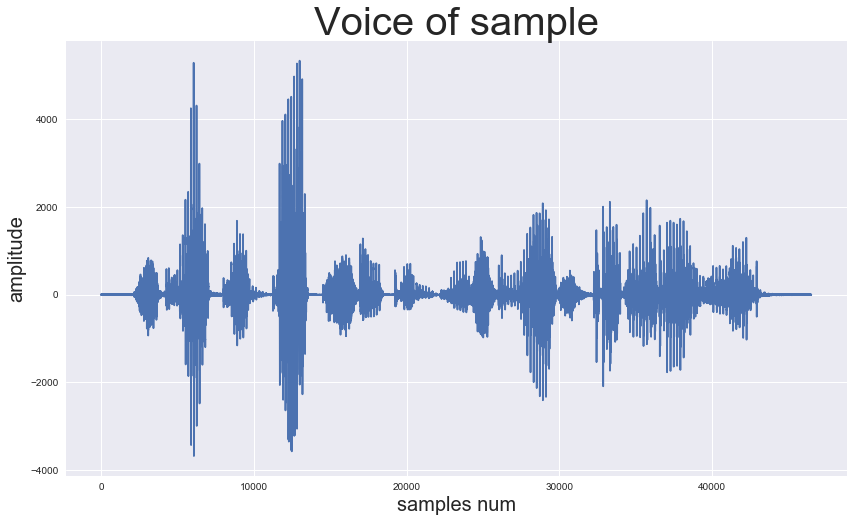

In [746]:
plt.figure(figsize=(14,8))
plt.plot(np.linspace(0,len(samples),len(samples)),samples) 
#np.linspace(): set up 3rd argument to sample_rate,otherwise default=50
plt.title("Voice of sample",fontsize=40)
plt.xlabel("samples num",fontsize=20)
plt.ylabel("amplitude",fontsize=20)
plt.show()

# 2. Frame segmentation

**Reason of Frame**  : the samples can be divided into frames because that on short time scales the audio signal doesn't change much (when we say it doesn't change, we mean statistically i.e. statistically stationary, obviously the samples are constantly changing on even short time scales).

if the frame size is too short, we can't get reliable spectral estimate, if too large, signal changed too much in one frame

In [747]:
t_feed=10 #feed time
t_frame=20 #frame time
fs=sample_rate/1000 #sample_rate of each ms
L_value=np.int(fs*t_frame)
L_value

320

In [748]:
def frame_segment(samples):
    #frame_num = K 
    frame_num=np.int((len(samples)-L_value)/(fs*t_feed))+1 #calculate the number of frames
    frame_set=[]
    for k in range(frame_num):
        frame_set.append(samples[k*np.int(fs*t_feed):k*np.int(fs*t_feed)+L_value])#[0,n] contains 0~n-1
    return frame_set,frame_num

In [749]:
frame_set,frame_num=frame_segment(samples)

# 3. Voice activity detection

In [750]:
len(frame_set)

289

In [751]:
#combined function
def voice_activity_detection(frame_set,frame_num,gamma=2.0):
    #step1:figure out the noise signal power
    mixed_power_set=[]
    for k in range(frame_num):
        mixed_power_set.append(1/(L_value)*np.sum((np.float64(frame_set[k]))**2))#use np.float64 to avoid overflow encountered in long scalars
    #step2:The noise power
    t_n=100
    frame_drop=np.int((t_n/t_feed)-1)
    no_speech_set=frame_set[:frame_drop]
    noise_power_set=(1/frame_drop)*np.sum(no_speech_set)
    #step3: detective
    mixed_power_set=pd.Series(mixed_power_set)
    train_power_set=mixed_power_set.loc[mixed_power_set>gamma*noise_power_set]
    train_frame_set=[]
    for index in train_power_set.index:
        train_frame_set.append(frame_set[index])
    train_frame_set=np.array(train_frame_set)
    return train_frame_set

In [752]:
train_frame_set=voice_activity_detection(frame_set,frame_num)
train_frame_set.shape

(240, 320)

## Step 1:

try to figure out the noise signal power from the mixed signal power

In [753]:
mixed_power_set=[]
for k in range(frame_num):
    mixed_power_set.append(1/(L_value)*np.sum((np.float64(frame_set[k]))**2))#use np.float64 to avoid overflow encountered in long scalars

In [754]:
len(mixed_power_set)

289

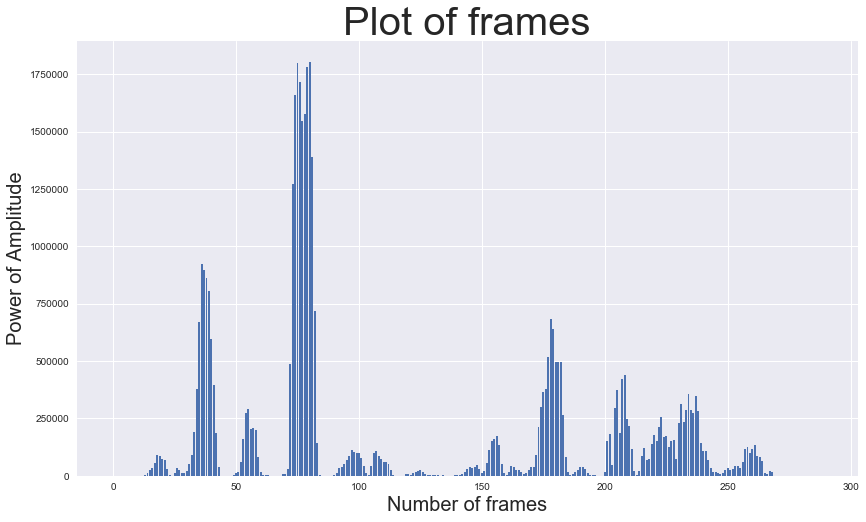

In [755]:
plt.figure(figsize=(14,8))
plt.bar(range(frame_num),mixed_power_set)  #plt,bar(index,height(value))
plt.title("Plot of frames",fontsize=40)
plt.ylabel("Power of Amplitude",fontsize=20)
plt.xlabel("Number of frames",fontsize=20)
plt.show()

## Step 2:

drop first $t_{n}$ samples becasue of silence

In [756]:
t_n=100
K_drop=np.int((t_n/t_feed)-1)

In [757]:
no_speech_set=frame_set[:K_drop]
noise_power_set=(1/K_drop)*np.sum(no_speech_set)

## Step 3

try to find a $\gamma$ as the threshold to satisfied that :
$$P(k)\lessgtr\gamma * P_{N}$$, only the frames containing speech should be used to train the classification model

In [758]:
gamma=2.0
mixed_power_set=pd.Series(mixed_power_set)

In [759]:
train_power_set=mixed_power_set.loc[mixed_power_set>gamma*noise_power_set]
train_power_set

13       2535.984375
14      10788.109375
15      24249.515625
16      35166.484375
17      56901.896875
18      89139.062500
19      85787.921875
20      73581.484375
21      67041.318750
22      29784.571875
23       2651.453125
24        780.659375
25      13694.181250
26      32237.650000
27      27101.337500
28      12142.450000
29      11854.475000
30      21730.837500
31      51603.331250
32      89709.753125
33     190800.581250
34     379672.187500
35     671679.500000
36     922163.137500
37     896364.087500
38     860401.534375
39     807384.337500
40     597829.812500
41     394316.618750
42     187153.278125
           ...      
240    109057.771875
241    107998.693750
242     68126.818750
243     32658.093750
244     14645.128125
245     15067.168750
246     12234.112500
247      9902.543750
248     13337.190625
249     26861.653125
250     34009.721875
251     25351.009375
252     30687.800000
253     43977.371875
254     43136.750000
255     36044.006250
256     59377

In [760]:
train_frame_set=[]
for index in train_power_set.index:
    train_frame_set.append(frame_set[index])

In [761]:
train_frame_set=np.array(train_frame_set)
train_frame_set.shape

(240, 320)

# 4. Feature extraction

The next step is to calculate the power spectrum of each frame. This is motivated by the human cochlea (an organ in the ear) which vibrates at different spots depending on the frequency of the incoming sounds. 

**Window**

we use Von_Hann_Fester to minimize the effect 

In [762]:
def window_func(train_frame_set):
    window = np.hanning(len(train_frame_set[0]))
    #window = np.hamming(len(train_frame_set[0]))
    train_frame_set=np.float64(train_frame_set)
    frame_windowed_set=np.multiply(train_frame_set,window) # apply the window to the frames
    #using np.multiply , multipy by elements
    return frame_windowed_set

we plot the hanning window and see

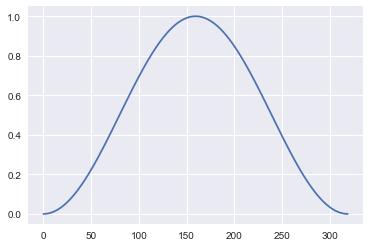

In [763]:
#window on the time domain
plt.plot(range(len(train_frame_set[0])),np.hanning(len(train_frame_set[0]))) ####
plt.show()

In [764]:
#the window on the frequency domain
pow_frames_window,mag_frames_window=Flourier_transfer(np.hanning(len(train_frame_set[0])),NFFT)

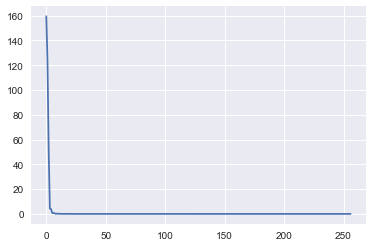

In [765]:
plt.plot(mag_frames_window)
plt.show()

In [766]:
frame_windowed_set= window_func(train_frame_set)

** Fourier-Transform and Power Spectrum**

When the DFT is computed for purely real input, the output is Hermitian-symmetric, i.e. the negative frequency terms are just the complex conjugates of the corresponding positive-frequency terms, and the negative-frequency terms are therefore redundant. This function does not compute the negative frequency terms, and the length of the transformed axis of the output is therefore n//2 + 1.

We would generally perform a 512 point FFT and keep oly the first 257 coefficents.

In [767]:
NFFT=512
#mag_frames = np.absolute(np.fft.rfft(sample_frame, NFFT))  # Magnitude of the FFT
#mag_frames = np.absolute(np.fft.fft(sample_frame, NFFT))
def Flourier_transfer(frame_windowed_set,NFFT):
    mag_frames = np.absolute(np.fft.rfft(frame_windowed_set, NFFT)) 
    pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2)) 
    return pow_frames,mag_frames

In [768]:
pow_frames,mag_frames=Flourier_transfer(frame_windowed_set,NFFT)

In [769]:
#leak = unwindowed
pow_frames_leak,mag_frames_leak=Flourier_transfer(train_frame_set,NFFT)

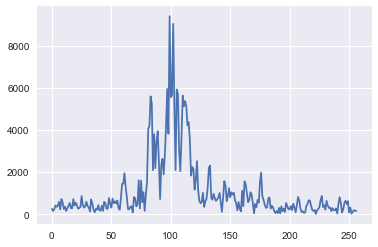

In [770]:
plt.plot(mag_frames_leak[1,:]) # without window(with spectral leakage)

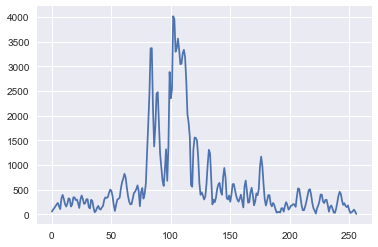

In [771]:
plt.plot(mag_frames[1,:]) # the frequency of each frame(with window)

**Mel Scale Function**

In [772]:
def Mel_scale(freq_orig):
    if freq_orig <= 1000:
        f_mel = freq_orig
    else:
        f_mel = 2595 * np.log10(1 + (freq_orig/2) / 700)
    return f_mel

** Mel Scale Inverse Function**

In [773]:
def Mel_scale_inv(f_mel):
    f_orig = 700 * (10**(f_mel / 2595) - 1)
    return f_orig

In [774]:
#sample_rate=16000
nfilt = 22
def mel_filter_bank(sample_rate,NFFT,pow_frames,nfilt):
    low_freq_mel = 0
    #(sample_rate/2)??? because of rfft?
    high_freq_mel = Mel_scale(sample_rate)  # Convert Hz to Mel #Mel Scale function 
    # nfilt + 2: add the boundary points
    mel_points = np.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
    hz_points = Mel_scale_inv(mel_points)  # Convert Mel to Hz  # Power Spectrum # Inverse function
    bins = np.floor((NFFT + 1) * hz_points / sample_rate)
    # fbank = Figure 3.9 22 triangular filter set
    fbank = np.zeros((nfilt, int(np.floor(NFFT / 2 + 1))))
    for m in range(1, nfilt + 1):
        f_m_minus = int(bins[m - 1])   # left
        f_m = int(bins[m])             # center
        f_m_plus = int(bins[m + 1])    # right
        for k in range(f_m_minus, f_m):
            fbank[m - 1, k] = (k - bins[m - 1]) / (bins[m] - bins[m - 1])
        for k in range(f_m, f_m_plus):
            fbank[m - 1, k] = (bins[m + 1] - k) / (bins[m + 1] - bins[m])
    filter_banks = np.dot(pow_frames, fbank.T)
    #filter_banks = np.where(filter_banks == 0, np.finfo(float).eps, filter_banks)  # Numerical Stability #np.where: return the index of filter_banks == 0
    #filter_banks = 20 * np.log10(filter_banks)  # dB
    return filter_banks.T,fbank,hz_points

then we plot the mel filter bank and see

In [775]:
filter_banks,fbank,hz_points=mel_filter_bank(sample_rate,NFFT,pow_frames,nfilt)

In [776]:
def mel_plot(fbank,hz_points):
    plt.figure(figsize=(14,8))
    plt.title("mel-filter-bank",size=30)
    plt.xlabel("frequency",size=20)
    plt.ylabel("Amplitude",size=20)
    
    for i in range(fbank.shape[0]):
        plt.plot(np.linspace(0,np.int32(hz_points[-1]),(NFFT+2)/2),fbank[i])
    plt.show()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning:

object of type <class 'float'> cannot be safely interpreted as an integer.



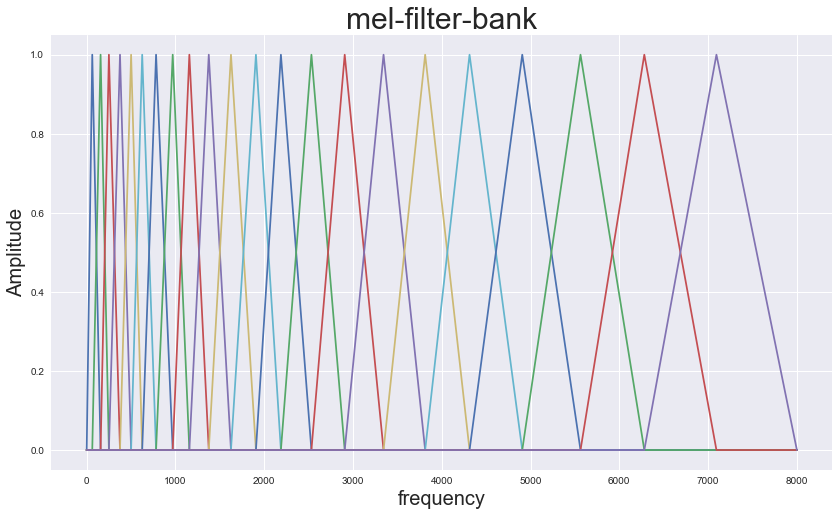

In [777]:
mel_plot(fbank,hz_points)

calculate the feature vectore $\underline{b}$ using DCT

In [778]:
num_features = 15 
#b_n = np.zeros((num_features,303))
#train_frame_set = (303,320)
def DCT(Y,num_features):
    b_n =0
    b_set=[]
    for n_value in range(num_features):    
        for m in range(Y.shape[0]):
            b_n=np.around(np.log10(Y[m]))*np.cos(np.around(math.pi*(n_value+1)*(m-0.5)/(Y.shape[0])))#ignore the mean a
            #abandon the n=0
        b_set.append(b_n)
    b_set=np.array(b_set)
    return b_set

In [779]:
b_new = DCT(filter_banks,num_features)
b_new.shape

(15, 240)

In [780]:
#ubm_dataset=loadmat("/Users/Mata/Documents/2017/学习/ws2017:18/PUL/forStudents/ubm/UBM_GMMNaive_MFCC_Spectrum0to8000Hz.mat",mat_dtype=True)
ubm_dataset=loadmat("C:\\Users\\hasee\\workspace\\workspace\\lab\\patRecDat\\forStudents\\ubm\\UBM_GMMNaive_MFCC_Spectrum0to8000Hz.mat",mat_dtype=True)

In [781]:
ubm_dataset.keys()

dict_keys(['__header__', '__version__', '__globals__', 'var', 'K', 'weights', 'D', 'means'])

In [782]:
ubm_means=ubm_dataset['means']
ubm_var = ubm_dataset['var']
ubm_weights = ubm_dataset['weights']
ubm_var_set=[]
K_value=49

#transfer variance of UBM to cov
for k in range(K_value):
    ubm_var_set.append(np.diag(ubm_var[k]))
ubm_var_set=np.array(ubm_var_set)
ubm_var=ubm_var_set

In [783]:
ubm_means.shape

(49, 15)

# 5. Probabilistic model of speech

## 5.1: Universal Background Model

naive GMM-UBM --**ubm_value_set:**$$P_{UBM}(\underline{b})=\sum_{k=1}^{K}\omega_{UBM,k}*p(\underline{b}|\underline{\mu}_{UBM,k},C_{UBM,k})$$

In [904]:
K_value=ubm_var.shape[0] #number of naive models
T_value=b_new.shape[1] #number of frames

In [785]:
math.pi

3.141592653589793

In [786]:
np.linalg.det(ubm_var[0])

30377.627841330639

In [787]:
np.exp(0)

1.0

In [788]:
np.exp((-0.5)*np.dot(np.dot((b_new[:,0]-ubm_means[0]),np.linalg.inv(ubm_var[0,:,:])),(b_new[:,0]-ubm_means[0])))

7.8127406998772049e-21

In [852]:
# probability density function
def density_func(b_new,ubm_means,ubm_var,T_value_1,K_value_1):
    D=b_new.shape[0]
    prob=(1/((2*math.pi)**(D/2)*(np.linalg.det(ubm_var[K_value_1,:,:]))**(1/2)))*\
    np.exp((-0.5)*np.dot(np.dot((b_new[:,T_value_1]-ubm_means[K_value_1]),np.linalg.inv(ubm_var[K_value_1,:,:])),(b_new[:,K_value_1]-ubm_means[K_value_1])))
    return prob
    

In [853]:
b_new.shape[1]

240

In [854]:
#calculate the naive GMM-UBM
def naive_G_U(b_new,ubm_means,ubm_var,ubm_weights,T_value):
    ubm_value_set=[]
    for t in range(T_value): 
        prob_ubm=[]
        for i in range(K_value):
            ubm_pdf=density_func(b_new,ubm_means,ubm_var,t,i)
            prob_ubm.append(ubm_pdf)
        prob_ubm=np.array(prob_ubm)
        ubm_value = np.dot(ubm_weights,prob_ubm)
        #ubm_value = np.dot(ubm_weights,prob_ubm).flatten()
        ubm_value_set.append(ubm_value)
    ubm_value_set=np.array(ubm_value_set)
    return ubm_value_set

In [855]:
start=time.time()
ubm_value_set=naive_G_U(b_new,ubm_means,ubm_var,ubm_weights,T_value)
print(time.time()-start)

2.374192476272583


In [856]:
ubm_value_set.shape

(240, 1)

## 5.2 Speaker models adaption

GMM model for a particular speaker with his training data is adapted from the UBM-GMM in equation by modifying the parameters $\omega_{UBM,k},\mu_{UBM,k},C_{UBM,K}$,first we calcualte the posteriori probability $$p=\frac{a}{b},1\leq t\leq T$$

### 5.2.1 posteriori probability

In [795]:
def post_prob_model(b_new,ubm_weights,ubm_means,ubm_var,ubm_value_set,T_value):
    model_set=[] #include 49 models
    for k in range(K_value):
        frame_set=[] #include number of frames
        for t in range(T_value):
            frame_set.append(ubm_weights[:,k]*density_func(b_new,ubm_means,ubm_var,t,k)/ubm_value_set[t,:])
        frame_set=np.array(frame_set)
        model_set.append(frame_set)
    model_set=np.array(model_set)
    return model_set.reshape(model_set.shape[0],model_set.shape[1])

In [796]:
model_set=post_prob_model(b_new,ubm_weights,ubm_means,ubm_var,ubm_value_set,T_value)

In [887]:
model_set.shape

(49, 240)


### 5.2.2 Mean

In [798]:
np.sum(model_set,axis=1).shape

(49,)

In [799]:
def mu_model(model_set,b_new):
    value_temp=np.dot(model_set,b_new.T)
    mu_ubm=np.multiply((1/np.sum(model_set,axis=1)),value_temp.T)
    return mu_ubm.T

In [800]:
mu_ubm=mu_model(model_set,b_new)

In [801]:
mu_ubm.shape

(49, 15)

In [803]:
mu_ubm

array([[-0.99085552,  0.96100731, -0.91192454,  0.84458958, -0.76035017,
         0.66089234,  0.40843781, -0.53329751,  0.64748327, -0.74870965,
         0.83495059, -0.90447999,  0.95590622, -0.98819999,  1.00071492],
       [-0.99009369,  0.96026844, -0.9112234 ,  0.84394022, -0.75976557,
         0.66038421,  0.40812378, -0.53288749,  0.64698545, -0.748134  ,
         0.83430864, -0.90378458,  0.95517127, -0.9874402 ,  0.99994551],
       [-0.9905461 ,  0.96070721, -0.91163977,  0.84432584, -0.76011273,
         0.66068596,  0.40831026, -0.53313098,  0.64728108, -0.74847584,
         0.83468986, -0.90419755,  0.95560772, -0.9878914 ,  1.00040242],
       [-0.99030268,  0.96047113, -0.91141574,  0.84411836, -0.75992594,
         0.6605236 ,  0.40820992, -0.53299997,  0.64712202, -0.74829191,
         0.83448474, -0.90397535,  0.95537289, -0.98764863,  1.00015658],
       [-0.98999481,  0.96017253, -0.91113239,  0.84385593, -0.75968968,
         0.66031825,  0.40808301, -0.53283426, 

### 5.2.3 Covariance

In [805]:
mu_temp =[]
for m in range(K_value):
    mu_temp.append(np.dot(mu_ubm[m,:].reshape(-1,1),mu_ubm[m,:].reshape(1,-1)))
    

In [806]:
mu_temp=np.array(mu_temp)

In [807]:
b_temp=[]
for t in range(T_value):
    b_temp.append(np.dot(b_new[:,t].reshape(-1,1),b_new[:,t].reshape(1,-1)))
b_temp=np.array(b_temp)
b_temp.shape

(240, 15, 15)

In [812]:
np.outer(mu_ubm[0,:],mu_ubm[0,:]).shape

(15, 15)

In [859]:
(b_new[:,0]-mu_ubm[0,:])**2

array([ 3.91692378,  3.68449388,  3.3177393 ,  2.84587551,  2.30649091,
        1.74255257,  0.66554331,  1.13465433,  1.67255944,  2.23640942,
        2.7812883 ,  3.26379135,  3.64548265,  3.89595689,  3.99526144])

In [931]:
def cov_model(model_set,b_new,mu_ubm,T_value):
    value_temp = []
    b_temp = []
    sum_temp=[]
    mu_temp =[]
    cov_set =[]
    #calculate mu*mu.T
    for m in range(K_value):
        mu_temp.append(np.diag(mu_ubm[m,:]**2))
    mu_temp=np.array(mu_temp)
    #calculate b*b.T
    for t in range(T_value):
        b_temp.append((b_new[:,t]**2))
    b_temp=np.array(b_temp)
    print(b_temp.shape)
    #calculate sum(p(k|b)*b*b.T)
    value_temp=np.dot(model_set,b_temp)
    #value_temp=value_temp.reshape(K_value,15,15)
    #sum(p(k|b))
    sum_value = np.sum(model_set,axis=1)
    #calculate cov
    for k in range(K_value):
        cov_set.append(np.diag((1/sum_value[k])*value_temp[k])-mu_temp[k,:,:])
    cov_set=np.array(cov_set)
    return cov_set

In [932]:
model_set.shape

(49, 240)

In [935]:
cov_set=[]
cov_set = cov_model(model_set,b_new,mu_ubm,T_value)
cov_set[0]

(240, 15)


array([[ 0.0008541 ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.00080341,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.00072344,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.00062055,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.00050294,
         0.        ,  0.        ,  0.        , 

### 5.2.4 Weight 

weight of K mode

In [936]:
def weight_model(model_set,T_value):
    return (1/T_value)*np.sum(model_set,axis=1)

In [937]:
weights_model=weight_model(model_set,T_value)

In [938]:
weights_model.shape

(49,)

In [939]:
np.sum(weights_model)

0.99999999999999989

## 5.3 Speaker model adaption

Now we combine the parameters $\omega_{UBM,k},\mu_{UBM,k},C_{UBM,K}$ of the k_th mode of the UBM-GMM with $\omega_{UBM,k},\mu_{UBM,k},C_{UBM,K}$ to obtain the paramenters of the adapted k-th mode of the speaker specific GMM:
$$p=\frac{a}{b},1\leq t\leq T$$

In [940]:
#gamma_UBM = 0.0000000000000000000000000000000001 
#gamma_UBM=0.1
#alpha = np.sum(model_set,axis=1)/(gamma_UBM+np.sum(model_set,axis=1))

Function:adapted_mode to update k_th mode of the speaker specific GMM

In [941]:
def adapted_mode(model_set,mu_ubm,ubm_means,cov_set,ubm_var,weights_model,ubm_weights,gamma_UBM=0):
    
    #caculate alpha
    alpha = np.sum(model_set,axis=1)/(gamma_UBM+np.sum(model_set,axis=1))

    #caculate the adapted mean
    new_mu=np.multiply(alpha,mu_ubm.T)+np.multiply((1-alpha),ubm_means.T)

    #calculate adapted variance    
    new_cov=np.multiply(alpha,cov_set.T)+np.multiply((1-alpha),ubm_var.T)
    #print(new_cov[0])
    #calculate adapted mean
    new_weight=np.multiply(alpha,weights_model)+np.multiply((1-alpha),ubm_weights.ravel())
    return new_mu.T,new_cov.T,new_weight

Function:save_model() to store the set of paraments for each model

In [942]:
def save_model(name,new_mu,new_cov,new_weight):
    save_path="C:\\Users\\hasee\\workspace\\workspace\\lab\\patRecDat\\forStudents\\ubm\\"\
    +str(name)+".mat"
    #save_path="/Users/Mata/Documents/2017/学习/ws2017:18/PUL/forStudents/ubm/"\
    #+str(name)+".mat"
    savemat(save_path,{'mu':new_mu,'new_cov':new_cov,'new_weight':new_weight})   

In [943]:
new_mu,new_cov,new_weight=adapted_mode(model_set,mu_ubm,ubm_means,cov_set,ubm_var,weights_model,ubm_weights)

In [944]:
save_model('mrpc0',new_mu,new_cov,new_weight)

# 6: Speaker identification

In [945]:
#identification
def identification(b_test,new_mu,new_cov,new_weight,T_value):
    #caculate the concatenated probability
    test_pdf=naive_G_U(b_test,new_mu,new_cov,new_weight,T_value)
    #print(test_pdf)
    concate_prob=np.sum(np.log(test_pdf))
    return concate_prob

In [946]:
new_cov[0]

array([[ 0.0008541 ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.00080341,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.00072344,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.00062055,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.00050294,
         0.        ,  0.        ,  0.        , 

In [947]:
concate_prob=identification(b_new,new_mu,new_cov,new_weight,T_value)

In [948]:
concate_prob

6227.2330846128025

# 7. Cross Validation

In [949]:
def feature_eng(dataset):
    #2. frame_segmentation
    frame_set,frame_num=frame_segment(dataset)
    
    #3. Voice activaty detection
    #gamma = 100.0
    train_frame_set=voice_activity_detection(frame_set,frame_num,gamma=100.0)
    
    #4.1 window_func
    frame_windowed_set= window_func(train_frame_set)
    
    #4.2 fft
    pow_frames,mag_frames=Flourier_transfer(frame_windowed_set,NFFT)
    
    #4.3 filtered
    filter_banks,fbank,hz_points=mel_filter_bank(sample_rate,NFFT,pow_frames,nfilt)
    
    #4.4 get featured 
    b_new = DCT(filter_banks,num_features)
    return b_new

In [950]:
def speaker_adapted(b_new,ubm_means,ubm_var,ubm_value_set,ubm_weights,T_value):
    model_set=post_prob_model(b_new,ubm_weights,ubm_means,ubm_var,ubm_value_set,T_value)
    
    mu_ubm=mu_model(model_set,b_new)
    
    cov_set = cov_model(model_set,b_new,mu_ubm,T_value)
    
    weights_model=weight_model(model_set,T_value)
    
    new_mu,new_cov,new_weight=adapted_mode(model_set,mu_ubm,ubm_means,cov_set,ubm_var,weights_model,ubm_weights,gamma_UBM=0)
    
    return new_mu,new_cov,new_weight

now we apply the cross validation onto 10 people

In [951]:
#cross validation for 20 models
#default 
t_feed=10 #feed time
t_frame=20 #frame time
sample_rate=16000
fs=sample_rate/1000 #sample_rate of each ms
L_value=np.int(fs*t_frame)
NFFT=512
nfilt=22

# extract the wav files 
test_file_set=[]
name_set=[]
start=time.time()
for name in ['faks0', 'fdac1', 'felc0', 'fjem0',\
             'mdab0', 'mjsw0', 'mreb0', 'mrjo0', \
             'msjs1', 'mstk0', 'mwbt0', 'fcmr0',\
             'fdrd1', 'fjas0', 'fjre0', 'fjwb0', \
             'fpas0', 'fram1', 'fslb1', 'mabw0']:
    whole_set=dataset.get(name,'no such file').copy()
    
    print("now the this model is for person "+name)
    print("Model Start")
    #add copy to prevent original change
    #score_set=[]
    
    #obtain test and train set, (test set temporarily use the first file)
    test_file=whole_set[0]
    test_file_set.append(test_file)
    name_set.append(name)
    train_set=whole_set.copy()
    train_set.remove(test_file)
    train_set=np.concatenate(train_set)
    
    #feature engineering 
    K_value=ubm_var.shape[0] #number of naive models
    
    b_train=feature_eng(train_set)
    
    T_value=b_train.shape[1] #number of frames
    #5.1 naive GMM-UBM
    ubm_value_set=naive_G_U(b_train,ubm_means,ubm_var,ubm_weights,T_value)
    
    #5.2 Speaker adaption
    new_mu,new_cov,new_weight=speaker_adapted(b_train,ubm_means,ubm_var,ubm_value_set,ubm_weights,T_value)
    #print(b_test.shape,new_mu.shape,new_cov.shape,new_weight.shape)
    save_model(name,new_mu,new_cov,new_weight)
    
    print(str(name)+" spend time %5.1f minute"%((time.time()-start)/60))
    
print("Traing compeleted")
    
    
    

now the this model is for person faks0
Model Start
(1594, 15)
faks0 spend time   0.4 minute
now the this model is for person fdac1
Model Start
(1655, 15)
fdac1 spend time   0.8 minute
now the this model is for person felc0
Model Start
(997, 15)
felc0 spend time   1.1 minute
now the this model is for person fjem0
Model Start
(1952, 15)
fjem0 spend time   1.6 minute
now the this model is for person mdab0
Model Start
(1070, 15)
mdab0 spend time   1.8 minute
now the this model is for person mjsw0
Model Start
(1327, 15)
mjsw0 spend time   2.2 minute
now the this model is for person mreb0
Model Start
(1209, 15)
mreb0 spend time   2.5 minute
now the this model is for person mrjo0
Model Start
(968, 15)
mrjo0 spend time   2.8 minute
now the this model is for person msjs1
Model Start
(982, 15)
msjs1 spend time   3.0 minute
now the this model is for person mstk0
Model Start
(836, 15)
mstk0 spend time   3.2 minute
now the this model is for person mwbt0
Model Start
(1543, 15)
mwbt0 spend time   3.6

In [952]:
# identification 20 stucks cross validation 
print("Model Start")
start=time.time()
score_set=[]
correct_num=0
false_num=0

for index_2,test_file in enumerate(test_file_set):
    test_set=np.array(test_file)
    K_value=ubm_var.shape[0] #number of naive models
    b_test=feature_eng(test_set)
    T_value=b_test.shape[1]
    eva_set=[]
    for index_1,name in enumerate(name_set):
        path="C:\\Users\\hasee\\workspace\\workspace\\lab\\patRecDat\\forStudents\\ubm\\"+str(name)+".mat"
        print("the test set is from "+str(name_set[index_2])+" testing the model "+str(name))
        lamda=loadmat(path,mat_dtype=True)
        new_mu=lamda['mu']
        new_cov=lamda['new_cov']
        new_weight=lamda['new_weight']
        scores=identification(b_test,new_mu,new_cov,new_weight,T_value)
        print("test score is ",scores)
        print("time cost %5.1f minute"%((time.time()-start)/60))
        eva_set.append(scores)
    test_name=name_set[eva_set.index(max(eva_set))]
    
    # calculate the detection rate
    if name_set[index_2] == test_name:
        correct_num +=1
    else:
        false_num +=1
print("the detection ratio is ",correct_num/(correct_num+false_num))
        
        
        
        
        
        

Model Start
the test set is from faks0 testing the model faks0
test score is  -453.764824094
time cost   0.0 minute
the test set is from faks0 testing the model fdac1
test score is  -1371.60224987
time cost   0.0 minute
the test set is from faks0 testing the model felc0
test score is  -3096.58992266
time cost   0.1 minute
the test set is from faks0 testing the model fjem0
test score is  6286.49584604
time cost   0.1 minute
the test set is from faks0 testing the model mdab0
test score is  -1377.19659736
time cost   0.1 minute
the test set is from faks0 testing the model mjsw0


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning:

overflow encountered in exp



test score is  inf
time cost   0.1 minute
the test set is from faks0 testing the model mreb0
test score is  -3390.96733032
time cost   0.2 minute
the test set is from faks0 testing the model mrjo0
test score is  -643.010227529
time cost   0.2 minute
the test set is from faks0 testing the model msjs1
test score is  -3177.51508669
time cost   0.2 minute
the test set is from faks0 testing the model mstk0
test score is  -1764.25127874
time cost   0.2 minute
the test set is from faks0 testing the model mwbt0
test score is  -958.962553638
time cost   0.3 minute
the test set is from faks0 testing the model fcmr0
test score is  -2606.15938864
time cost   0.3 minute
the test set is from faks0 testing the model fdrd1
test score is  -820.220535997
time cost   0.3 minute
the test set is from faks0 testing the model fjas0
test score is  -947.099859705
time cost   0.4 minute
the test set is from faks0 testing the model fjre0
test score is  -2062.29260344
time cost   0.4 minute
the test set is from f

KeyboardInterrupt: 

In [882]:
lamda=loadmat("C:\\Users\\hasee\\workspace\\workspace\\lab\\patRecDat\\forStudents\\ubm\\faks0.mat",mat_dtype=True)

In [ ]:
lamda

In [ ]:
len(test_file_set)

In [ ]:
whole_set=dataset.get('faks0','no such file').copy()

In [ ]:
temp_set=whole_set[0]
whole_set.remove(temp_set)

In [ ]:
len(whole_set)

In [ ]:
np.concatenate(whole_set)